# Mais sobre gráficos

In [61]:
# Configuração do matplot lib e importações
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20,10))

In [62]:
# Importando dados
dados = pd.read_csv('../dados/aluguel_residencial_sem_outliers.csv', sep=',')

In [63]:
dados.head()

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [64]:
# Criando uma area de plotagem
area = plt.figure()

<Figure size 1440x720 with 0 Axes>

In [65]:
# Informando que a figure vai ter 4 graficos (2 LINHAS, 2 COLUNAS, 1 GRAFICO)
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [66]:
# Criando o primeiro grafico scatter para a posição um da figura. 
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

# Criando o segundo gráfico histograma(frequencia)
g2.hist(dados.Valor)
g2.set_title('Histograma')

# Grafico de linha com 100 amostra dos dados
# Criando uma amostra de 100 registro aleatórios da Series Valor (REGISTRO RANDAMICOS)
amostra = dados.Valor.sample(100)
# Como a amostra é de registro aleatórios, os index estão todos bagunçado e por isso vamos organizar para não
# atrapalhar o nosso grafico
amostra.index = range(amostra.shape[0])
g3.plot(amostra)
g3.set_title('Amóstra (Valor)')

# Criando um grafico de barras agrupado por tipo com a media do valor total dos aluguel por Tipo
grupo = dados.groupby('Tipo')['Valor']
# O grafico de barra precisa dos labels/rótulos(index) e dos valores
# Extraindo os rotulos de cada grupo
labels = grupo.mean().index
# Extraindo a media de cada grupo
valores = grupo.mean().values
g4.bar(labels, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

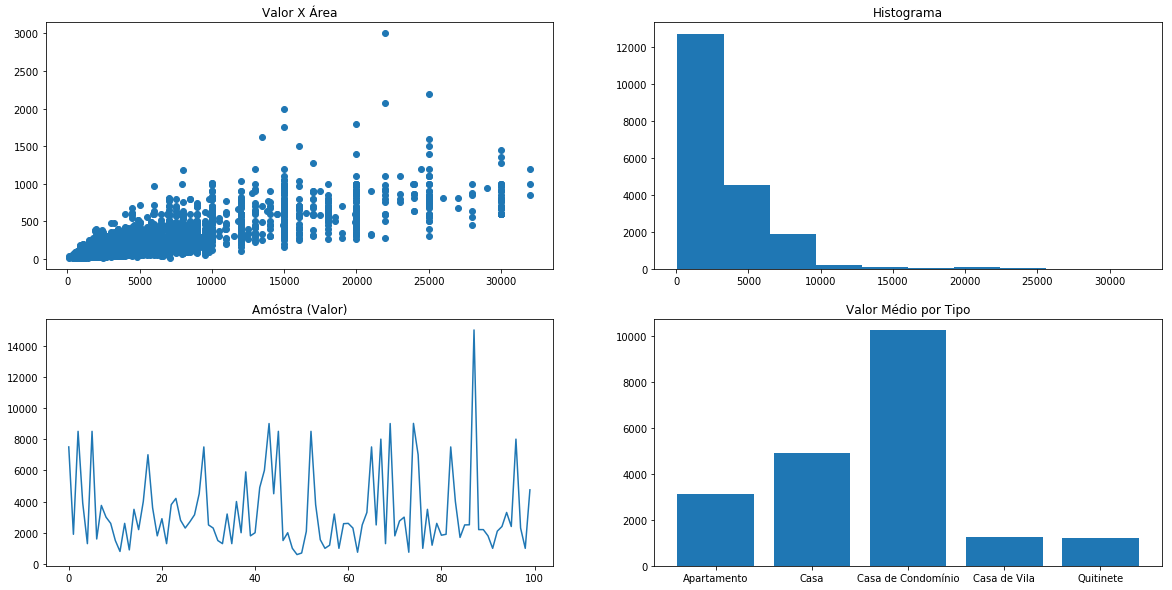

In [67]:
area

In [68]:
# Limpando a Area para que não fique alocando memória enquanto vamos executando
# area = None

In [69]:
amostra = dados.Valor.sample(100)
type(amostra)

pandas.core.series.Series

In [70]:
grupo = dados.groupby('Tipo')['Valor']
grupo.mean()

Tipo
Apartamento            3141.179874
Casa                   4921.707127
Casa de Condomínio    10256.458506
Casa de Vila           1243.682403
Quitinete              1190.047970
Name: Valor, dtype: float64

In [71]:
grupo.mean().index

Index(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'],
      dtype='object', name='Tipo')

In [72]:
# Salvar a imagem do grafico, dpi é a definição da imagem e o bbox remove o excesso das bordas brancas
# dos graficos
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

# Atividade

In [92]:
# Configuração do matplot lib e importações
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('../dados/aluguel_residencial_sem_outliers.csv', sep=',')

In [93]:
dados.head()

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [ ]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')